In [49]:
from models.ngram_model import NgramModel

from nltk.corpus import gutenberg

%matplotlib inline
import matplotlib.pyplot as pl

carroll = gutenberg.words('carroll-alice.txt')
s1 = gutenberg.words('shakespeare-caesar.txt');
s2 = gutenberg.words('shakespeare-hamlet.txt');
s3 = gutenberg.words('shakespeare-macbeth.txt');
# print len(s1), len(s2), len(s3)
# print len(carroll)
# gutenberg.fileids()

In [2]:
def test_corpora(corpora, query, n):
    for k in range(2, 5, 1):
        fm = NgramModel(k)
        fm.train(corpora)
        print "Result for a",(str(k)+"-gram: "),fm.predict_words(query, n)

In [4]:
test_corpora(carroll, "Alice was looking for", 10)

Result for a 2-gram:  Alice was looking for you only hear you fellows were all : ' t
Result for a 3-gram:  Alice was looking for them , but in a whisper .) ' You '
Result for a 4-gram:  Alice was looking for the fan and gloves , and was just going to


In [17]:
test_corpora(melville, "However , there is", 10)

Result for a  2-gram:  However , there is a whale - fleet of this , and the two
Result for a  3-gram:  However , there is no place to live in the captain ' s a
Result for a  4-gram:  However , there is no telling . But a day or two previous ,


In [18]:
test_corpora(melville, "I think that you", 10)

Result for a  2-gram:  I think that you must have been offered a whale , when the long
Result for a  3-gram:  I think that you do yours in approved state stocks bringing in good time
Result for a  4-gram:  I think that you really perceived drops of moisture in the spout - hole


25833 37360 23140


In [25]:
test_corpora(s1, "You are in great", 30)

Result for a  2-gram:  You are in great Caesar , and for your Testie Humour ? And do you are at Philippi Bru . I know not Brutus , I am no man , and friendly Conference ,
Result for a  3-gram:  You are in great Caesars eare , For if thou louest me , Ile ne ' re look ' d , And tell them , it is not the Face of men , and
Result for a  4-gram:  You are in great danger , I recouer them . As proper men as euer trod vpon Neats Leather , haue gone vpon my handy - worke Fla . But wherefore did you so


In [28]:
test_corpora(s2, "This great buyer of", 20)

Result for a  2-gram:  This great buyer of the King . I could be so , That I am very potent poyson in this ; Addicted so ,
Result for a  3-gram:  This great buyer of Land , And so am I ? Is it your owne necke downe Qu . Alas then , my Lord
Result for a  4-gram:  This great buyer of Land , with his Statutes , his Recognizances , his Fines , and the trifling of his fauours , Hold


In [33]:
test_corpora(s3, "I am afraid they", 20)

Result for a  2-gram:  I am afraid they not be done to thine owne demerits , That most may you haue tied me , and trouble , And
Result for a  3-gram:  I am afraid they haue more vices then it had before , to thinke what I doe , and the Ague eate them vp
Result for a  4-gram:  I am afraid they haue awak ' d him well , He hath a Wisdome , that doth guide his Valour , To act


# FIRST EXPERIMENTS : TUNING N

In [ ]:
for k in range(2, 5, 1):
    fm = NgramModel(k)
    fm.train(carroll)
    print "Results for a",(str(k)+"-gram: ")
    for k in range(5):
        print fm.predict_words("Alice was looking for", 10)
    print "\n"

Results for a 2-gram: 
Alice was looking for she ' s the morning I ' You know .
Alice was looking for Mabel ! Turn a stalk out , and she might
Alice was looking for them off after all the Cat : she thought Alice
Alice was looking for she picked up against the Mock Turtle yet .' '
Alice was looking for I can find it , after her foot ! And


Results for a 3-gram: 
Alice was looking for it ,' said Alice in a whisper , half to
Alice was looking for the rest waited in silence . ' Well , I
Alice was looking for it might end , you know .' ' Why ,
Alice was looking for eggs , I can ' t have put it in
Alice was looking for eggs , I know all the unjust things --' when


Results for a 4-gram: 
Alice was looking for the fan and a pair of gloves and a fan
Alice was looking for the fan and gloves , and , just as if
Alice was looking for the fan and gloves -- that is , but I
Alice was looking for the fan and the pair of white kid gloves and
Alice was looking for the fan and the pair of white kid glov

In [ ]:
for k in range(2, 5, 1):
    fm = NgramModel(k)
    fm.train(s3)
    print "Results for a",(str(k)+"-gram: ")
    for k in range(5):
        print fm.predict_words("I am afraid they", 10)
    print "\n\n"

Results for a 2-gram: 
I am afraid they had Chestnuts in vnusuall Pleasure , Rosse . This deed
I am afraid they liue a Truth , and Slippes of the Gin Son

# SMOOTHING

In [4]:
fm = NgramModel(5);
fm.train(carroll);
print fm.predict_words("That was Alice who", 5)
print len(fm.unique_words)

There is no likely ngram with these last words. Try some smoothing methods.
That was Alice who
3016


In [7]:
fm.smooth("LidstoneProbDist", fm.frequencies, 0.5)
for k in range(10):
    print fm.predict_words("That was Alice who", 1)

Winning match is:  [('That', 'was', 'Alice', 'who', u'Hearts'), 0.000331564986737383]
That was Alice who Hearts
Winning match is:  [('That', 'was', 'Alice', 'who', u'where'), 0.000331564986737383]
That was Alice who where
Winning match is:  [('That', 'was', 'Alice', 'who', u'ignorant'), 0.000331564986737383]
That was Alice who ignorant
Winning match is:  [('That', 'was', 'Alice', 'who', u'truth'), 0.000331564986737383]
That was Alice who truth
Winning match is:  [('That', 'was', 'Alice', 'who', u'fix'), 0.000331564986737383]
That was Alice who fix
Winning match is:  [('That', 'was', 'Alice', 'who', u'settle'), 0.000331564986737383]
That was Alice who settle
Winning match is:  [('That', 'was', 'Alice', 'who', u'executioner'), 0.000331564986737383]
That was Alice who executioner
Winning match is:  [('That', 'was', 'Alice', 'who', u'Your'), 0.000331564986737383]
That was Alice who Your
Winning match is:  [('That', 'was', 'Alice', 'who', u'soup'), 0.000331564986737383]
That was Alice who s

In [9]:
fm.smooth("LaplaceProbDist", fm.frequencies)
for k in range(10):
    print fm.predict_words("That was Alice who", 1)

Winning match is:  [('That', 'was', 'Alice', 'who', u'fairy'), 0.00033156498673740165]
That was Alice who fairy
Winning match is:  [('That', 'was', 'Alice', 'who', u'Croquet'), 0.00033156498673740165]
That was Alice who Croquet
Winning match is:  [('That', 'was', 'Alice', 'who', u'accounts'), 0.00033156498673740165]
That was Alice who accounts
Winning match is:  [('That', 'was', 'Alice', 'who', u'parchment'), 0.00033156498673740165]
That was Alice who parchment
Winning match is:  [('That', 'was', 'Alice', 'who', u'skurried'), 0.00033156498673740165]
That was Alice who skurried
Winning match is:  [('That', 'was', 'Alice', 'who', u'considered'), 0.00033156498673740165]
That was Alice who considered
Winning match is:  [('That', 'was', 'Alice', 'who', u'unjust'), 0.00033156498673740165]
That was Alice who unjust
Winning match is:  [('That', 'was', 'Alice', 'who', u'opposite'), 0.00033156498673740165]
That was Alice who opposite
Winning match is:  [('That', 'was', 'Alice', 'who', u'smoke'),

In [5]:
fm = NgramModel(4);
fm.train(carroll);

print "\n Let's try without smoothing"
for k in range(2):
    print fm.predict_words("her great disappointment", 2)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try WittenBell"
fm.smooth("WittenBellProbDist", fm.frequencies, 2*fm.frequencies.B())
for k in range(5):
    print fm.predict_words("her great disappointment", 2)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try Lidstone"
fm.smooth("LidstoneProbDist", fm.frequencies, 0.5)
for k in range(5):
    print fm.predict_words("her great disappointment", 2)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try Laplace"
fm.smooth("LaplaceProbDist", fm.frequencies)
for k in range(5):
    print fm.predict_words("her great disappointment", 2)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try SimpleGoodTuring"
fm.smooth("SimpleGoodTuringProbDist", fm.frequencies, len(fm.unique_words) ** 4)
for k in range(5):
    print fm.predict_words("her great disappointment", 2)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))


 Let's try without smoothing
Winning match is:  [('her', 'great', 'disappointment', u'it'), 1.0]
Winning match is:  [(u'great', u'disappointment', u'it', u'was'), 1.0]
her great disappointment it was
Winning match is:  [('her', 'great', 'disappointment', u'it'), 1.0]
Winning match is:  [(u'great', u'disappointment', u'it', u'was'), 1.0]
her great disappointment it was
2.93194945319e-05
0.0

 Let's try WittenBell
Winning match is:  [('her', 'great', 'disappointment', u'singing'), 0.0003315649867373829]
Winning match is:  [(u'great', u'disappointment', u'singing', u'everything'), 0.0003315649867373829]
her great disappointment singing everything
Winning match is:  [('her', 'great', 'disappointment', u'escape'), 0.0003315649867373829]
Winning match is:  [(u'great', u'disappointment', u'escape', u'show'), 0.0003315649867373829]
her great disappointment escape show
Winning match is:  [('her', 'great', 'disappointment', u'daughter'), 0.0003315649867373829]
Winning match is:  [(u'great', u'd

In [27]:
fm = NgramModel(4);
fm.train(carroll);

print "\n Let's try without smoothing"
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try WittenBell"
fm.smooth("WittenBellProbDist", fm.frequencies, 2*fm.frequencies.B())
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try Lidstone"
fm.smooth("LidstoneProbDist", fm.frequencies, 0.5)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))

print "\n Let's try Laplace"
fm.smooth("LaplaceProbDist", fm.frequencies)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))


print "\n Let's try SimpleGoodTuring"
fm.smooth("SimpleGoodTuringProbDist", fm.frequencies, len(fm.unique_words) ** 4)
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'it'))
print fm.probs_ng.prob(('her', 'great', 'disappointment', 'depends'))


 Let's try without smoothing
2.93194945319e-05
0.0

 Let's try WittenBell
1.53981183499e-05
1.53981183499e-05

 Let's try Lidstone
3.02877334679e-05
1.0095911156e-05

 Let's try Laplace
3.07962366999e-05
1.53981183499e-05

 Let's try SimpleGoodTuring
2.38862690455e-06
1.03037582927e-14


In [7]:
fm = NgramModel(2);
fm.train(carroll);
print "There are", len(fm.unique_words), "unique words in this dataset."

print "Frequency of (she, was):", fm.frequencies[('she','was')]
print "Frequency of (she, is):", fm.frequencies[('she','is')]
print "Frequency of (she, blue):", fm.frequencies[('she','blue')], "\n"
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))


# Gives a probability to a n-grams counted n-times given the probabilities of n-gram counted n+1-times.

print "\nSimpleGoodTuring\n"
fm.smooth("SimpleGoodTuringProbDist", fm.frequencies, len(fm.unique_words) ** 2)
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))
print "Prob ratio was/blue:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'blue'))


# The probability mass of unseen events equals the probability mass of events that occured once in the corpora

print "\nWittenBell\n"
fm.smooth("WittenBellProbDist", fm.frequencies, len(fm.unique_words) ** 2)
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))
print "Prob ratio was/blue:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'blue'))


# Adds 0.5 to each frequency and then computes MLE

print "\nLidstoneProbDist with parameter 0.5\n"
fm.smooth("LidstoneProbDist", fm.frequencies, 0.5)
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))
print "Prob ratio was/blue:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'blue'))



# Lidstone with parameter 1 should be the same as Laplace since it just adds one to each frequency and does MLE.

print "\nLidstoneProbDist with parameter 1\n"
fm.smooth("LidstoneProbDist", fm.frequencies, 1)
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))
print "Prob ratio was/blue:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'blue'))

print "\nLaplaceProbDist\n"
fm.smooth("LaplaceProbDist", fm.frequencies)
print "Prob of (she, is):", fm.probs_ng.prob(('she', 'is'))
print "Prob of (she, was):", fm.probs_ng.prob(('she', 'was'))
print "Prob of (she, blue):", fm.probs_ng.prob(('she', 'blue'))
print "Prob ratio was/is:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'is'))
print "Prob ratio was/blue:", fm.probs_ng.prob(('she', 'was')) / fm.probs_ng.prob(('she', 'blue'))


There are 3016 unique words in this dataset.
Frequency of (she, was): 49
Frequency of (she, is): 3
Frequency of (she, blue): 0 

Prob of (she, is): 8.79533261016e-05
Prob of (she, was): 0.00143657099299
Prob of (she, blue): 0.0
Prob ratio was/is: 16.3333333333

SimpleGoodTuring

Prob of (she, is): 6.0723297438e-05
Prob of (she, was): 0.00139591586689
Prob of (she, blue): 3.70129741617e-08
Prob ratio was/is: 22.9881433615
Prob ratio was/blue: 37714.2312527

WittenBell

Prob of (she, is): 6.02494326512e-05
Prob of (she, was): 0.000984074066636
Prob of (she, blue): 3.46876864035e-08
Prob ratio was/is: 16.3333333333
Prob ratio was/blue: 28369.5503698

LidstoneProbDist with parameter 0.5

Prob of (she, is): 8.3430669114e-05
Prob of (she, was): 0.00117994803461
Prob of (she, blue): 1.19186670163e-05
Prob ratio was/is: 14.1428571429
Prob ratio was/blue: 99.0

LidstoneProbDist with parameter 1

Prob of (she, is): 8.03325768682e-05
Prob of (she, was): 0.00100415721085
Prob of (she, blue): 2.008

# Plot probability distribution

In [122]:
def plot_corpora_frequencies(corpora, n, min_freq=0, max_freq=100, color=None):
    model = NgramModel(n)
    model.train(corpora)
    color = "blue" if color is None else color
    high_freq = [model.frequencies[x] for x in model.frequencies.keys() if (model.frequencies[x] >= min_freq and model.frequencies[x] <= max_freq)]
    high_freq = sorted(high_freq, reverse = True)
    pl.plot(range(len(high_freq)), high_freq, color)

In [123]:
def plot_nmodel_distribution(model, min_freq=0, max_freq=100, smoothing=None, *args):
    high_freq = [model.probs_ng.prob(x) for x in model.frequencies.keys() if (model.frequencies[x] >= min_freq and model.frequencies[x] <= max_freq)]
    high_freq = sorted(high_freq, reverse = True)
    pl.plot(range(len(high_freq)), high_freq, "blue")
    
    if smoothing is not None:
        model.smooth(smoothing, model.frequencies, *args)
        high_freq = [model.probs_ng.prob(x) for x in model.frequencies.keys() if (model.frequencies[x] >= min_freq and model.frequencies[x] <= max_freq)]
        high_freq = sorted(high_freq, reverse = True)
        pl.plot(range(len(high_freq)), high_freq, "red")

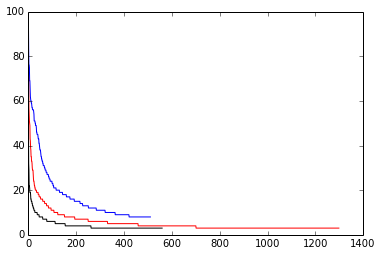

In [135]:
plot_corpora_frequencies(carroll, 2, 8, 100, "blue")
plot_corpora_frequencies(carroll, 3, 3, 100, "red")
plot_corpora_frequencies(carroll, 4, 3, 100, "black")
pl.show()

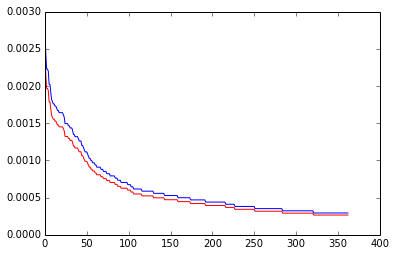

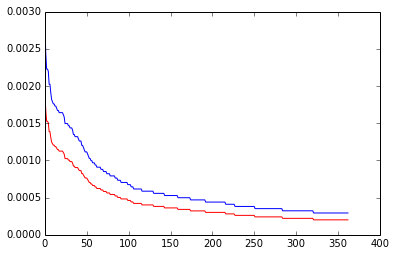

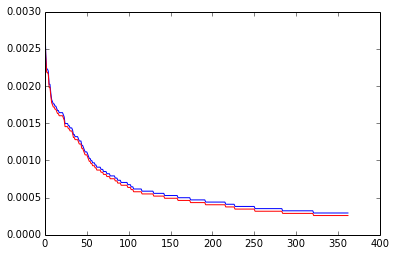

In [158]:
model = NgramModel(2)
model.train(carroll)
plot_ngrams_distribution(model, 10, 100, 'LidstoneProbDist', 0.3)
pl.show()
model = NgramModel(2)
model.train(carroll)
plot_ngrams_distribution(model, 10, 100, 'WittenBellProbDist', len(model.unique_words) ** 2)
pl.show()
model = NgramModel(2)
model.train(carroll)
plot_ngrams_distribution(model, 10, 100, 'SimpleGoodTuringProbDist', len(model.unique_words) ** 2 / 100)
pl.show()